In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

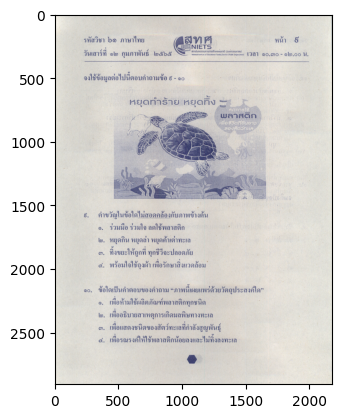

In [38]:
img = cv2.imread('./test_image/428340780_767510188614173_5890893365927811963_n.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [39]:
# img = cv2.medianBlur(img, 5) # ไม่เวิร์ดเท่าไหร่

# plt.imshow(img)
# plt.show()

[[228 224 213 ... 191 191 191]
 [232 229 214 ... 192 191 191]
 [233 230 218 ... 191 191 191]
 ...
 [205 235 235 ... 230 227 228]
 [204 233 235 ... 231 230 230]
 [203 232 235 ... 229 229 231]]


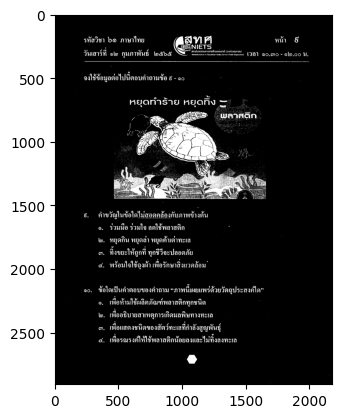

In [40]:
def clearer(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _ , thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    print(img_gray)
    plt.imshow(thresh, cmap='gray')
    return thresh

clearer_img = clearer(img)

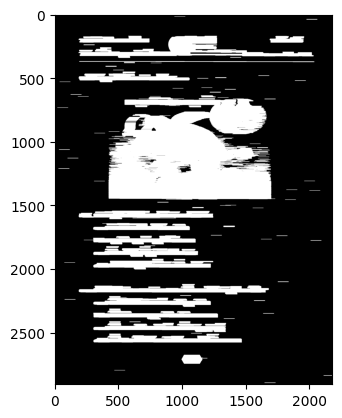

In [41]:
kernel = np.ones((3,85), np.uint8)

#vertical lines เพื่อขยายขอบให้เป็นขอบที่ชัดเจนขึ้น ทำให้ง่ายต่อการตรวจสอบขอบ และการนับขอบ โดยใช้ kernel ขนาด 3x25 และใช้การทำซ้ำ 1 ครั้ง
dilation = cv2.dilate(clearer_img, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')

In [42]:
#หาเส้นขอบ โดยใช้ cv2.RETR_EXTERNAL คือการหาเส้นขอบที่เป็นเส้นขอบภายนอกที่สุด และ cv2.CHAIN_APPROX_NONE คือการหาเส้นขอบที่ไม่มีการประมาณ
contours, _ = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#เรียงค่าตาม Y ตามลำดับน้อยไปมาก
sorted_lines = sorted(contours, key = lambda line : cv2.boundingRect(line)[1])

3 | x : 184, y : 171, w : 2028, h : 345
4 | x : 185, y : 171, w : 741, h : 225
5 | x : 1683, y : 172, w : 1954, h : 225
6 | x : 224, y : 239, w : 311, h : 245
7 | x : 189, y : 281, w : 297, h : 296
9 | x : 190, y : 370, w : 2034, h : 378
13 | x : 396, y : 407, w : 483, h : 414
15 | x : 530, y : 452, w : 630, h : 466
16 | x : 185, y : 467, w : 1056, h : 536
17 | x : 657, y : 474, w : 752, h : 487
19 | x : 1256, y : 497, w : 1344, h : 503
26 | x : 1213, y : 611, w : 1301, h : 617
28 | x : 1144, y : 639, w : 1259, h : 655
31 | x : 656, y : 653, w : 1012, h : 670
33 | x : 1128, y : 662, w : 1255, h : 671
36 | x : 626, y : 716, w : 740, h : 732
37 | x : 1048, y : 718, w : 1146, h : 733
49 | x : 1585, y : 1047, w : 1670, h : 1053
59 | x : 1496, y : 1179, w : 1690, h : 1186
68 | x : 1076, y : 1517, w : 1166, h : 1525
70 | x : 185, y : 1545, w : 1241, h : 1612
72 | x : 299, y : 1642, w : 1057, h : 1698
73 | x : 919, y : 1648, w : 1028, h : 1664
74 | x : 1320, y : 1663, w : 1411, h : 1674
76 | 

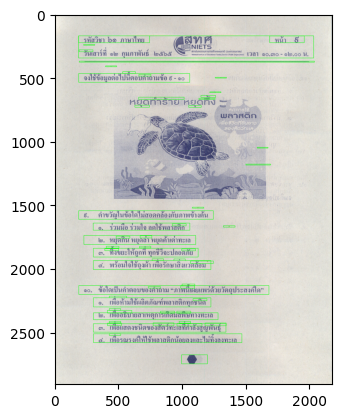

(17, 356, 3)


In [50]:
cropped_images = []
picture = []
img_for_rec = img.copy()
median_height = np.median([cropped_region.shape[0] for cropped_region in sorted_lines])
count = 0
for ctr in sorted_lines:
    x, y, w, h = cv2.boundingRect(ctr)
    #เอารูป Original มาตัด

    cropped_region = img[y:y+h, x:x+w] 

    if cropped_region.shape[0] > median_height:
        picture.append(cropped_region)
    elif cropped_region.shape[0] < median_height and cropped_region.shape[0] > 5 and cropped_region.shape[1] > 5:
        count += 1
        cv2.rectangle(img_for_rec, (x,y), (x+w, y+h), (0,255,0), 2)
        cropped_images.append(cropped_region)
        print(f"{count} | x : {x}, y : {y}, w : {w}, h : {h}")

        

plt.imshow(img_for_rec) 
plt.show()
cv2.imshow(f'Cropped Image {1}', cv2.cvtColor(cropped_images[13], cv2.COLOR_BGR2GRAY))
print(cropped_images[13].shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[215 220 217 ... 218 222 226]
 [215 215 214 ... 216 218 221]
 [213 211 213 ... 215 216 216]
 ...
 [211 215 213 ... 220 224 221]
 [208 209 216 ... 221 226 223]
 [201 207 212 ... 219 223 221]]
[[220 217 209 ... 212 212 212]
 [215 214 207 ... 210 210 209]
 [211 213 209 ... 207 207 207]
 ...
 [213 207 211 ... 211 214 213]
 [215 208 212 ... 209 211 209]
 [213 217 215 ... 214 211 208]]
[[217 216 210 ... 213 213 212]
 [217 215 205 ... 219 218 216]
 [216 213 207 ... 222 222 222]
 ...
 [216 216 214 ... 217 217 217]
 [215 217 215 ... 223 222 221]
 [220 217 215 ... 216 219 224]]
[[212 206 206 205 206 209 212 214 213 211 211 220 224 217 211 212 216 219
  201 215 216 211 212 212 211 216 217 215 211 209 208 208 208 208 207 206
  205 206 208 210 211 210 202 188 184 198 210 211 211 214 210 210 209 206
  203 204 207 211 212 205 200 202 209 214 213 210 208 209 208 206 209 214
  215 213 211 212 212 212 211 210 208 207 207 206 206 207 209]
 [210 199 201 207 211 211 211 214 214 213 210 213 211 208 212 220

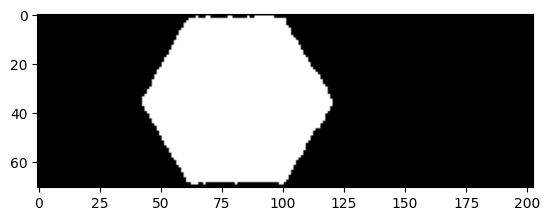

In [44]:
cropped_thresh = []
for i in cropped_images:
    cropped_thresh.append(clearer(i))



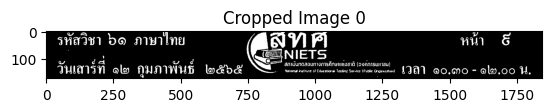

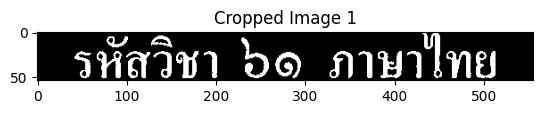

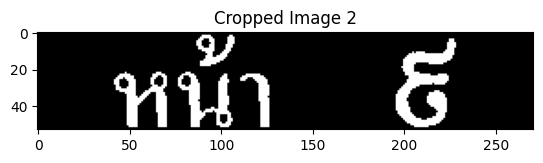

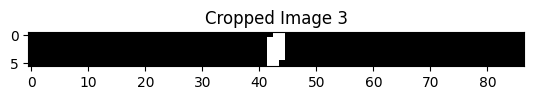

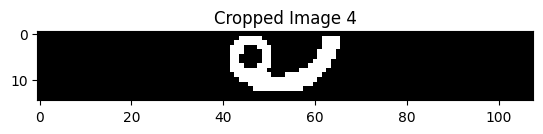

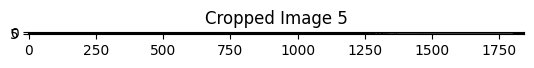

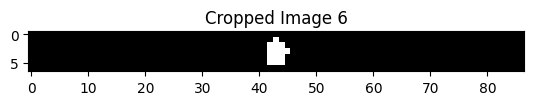

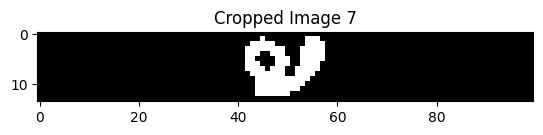

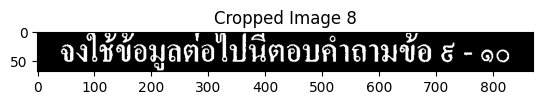

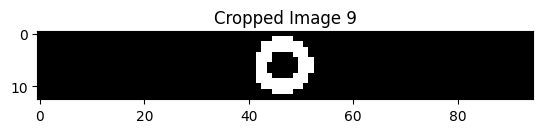

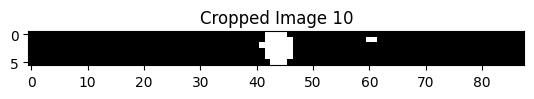

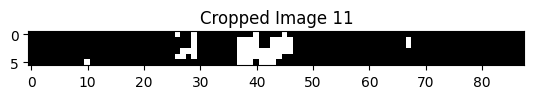

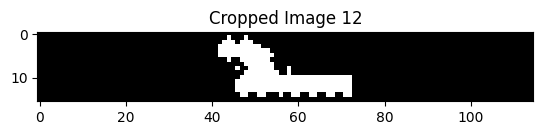

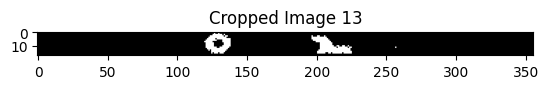

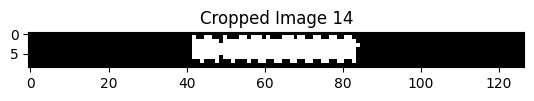

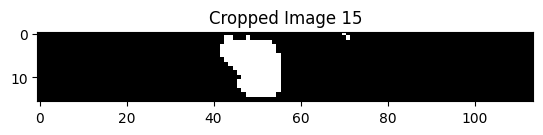

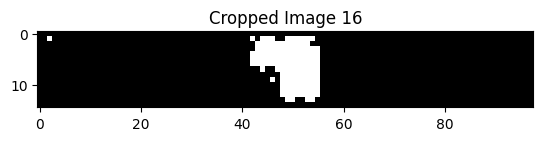

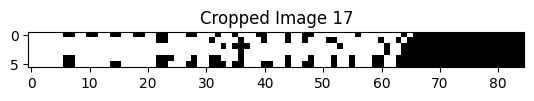

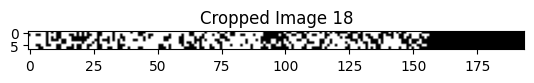

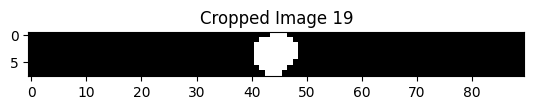

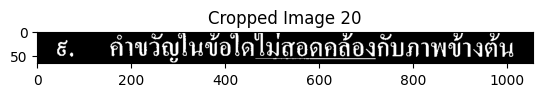

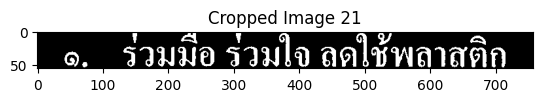

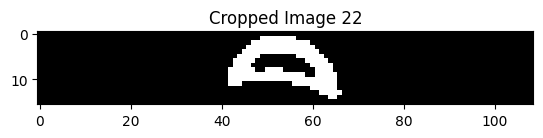

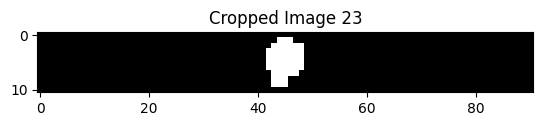

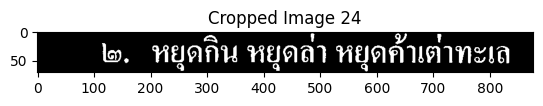

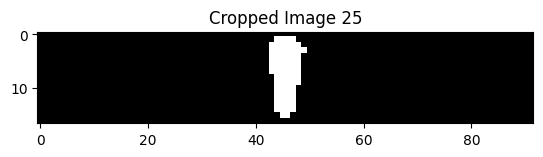

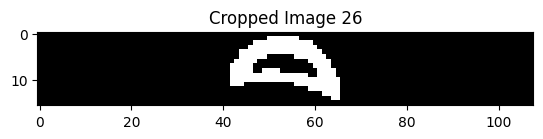

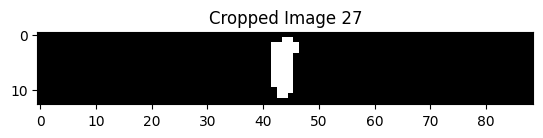

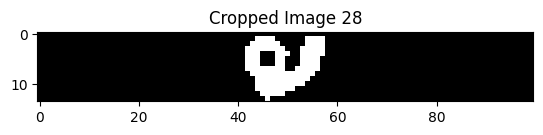

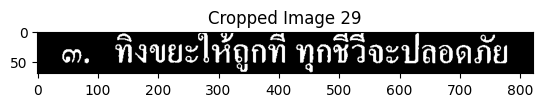

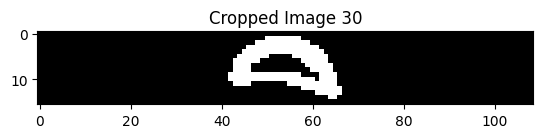

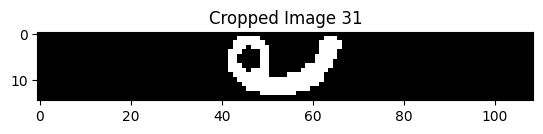

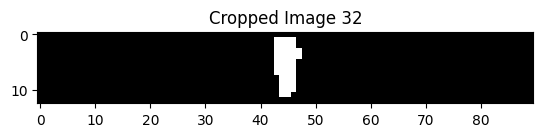

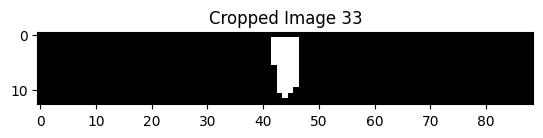

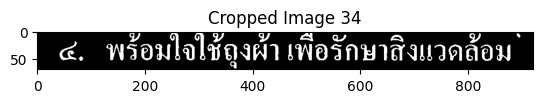

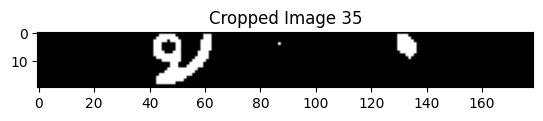

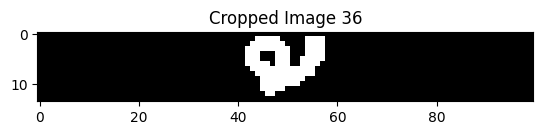

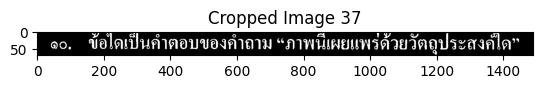

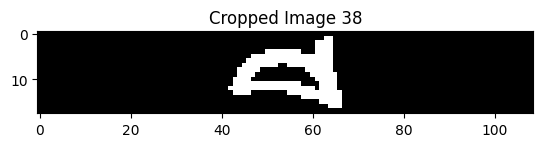

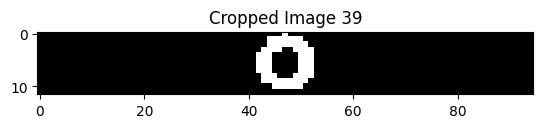

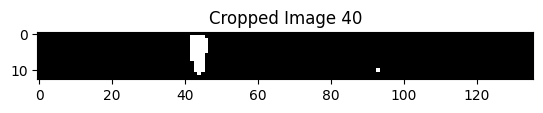

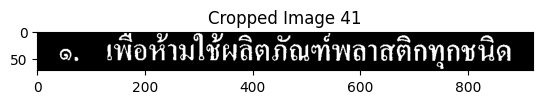

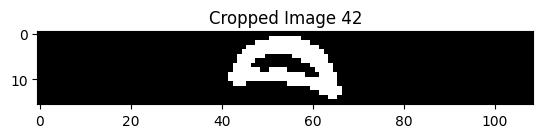

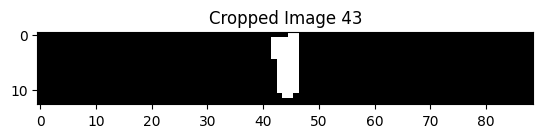

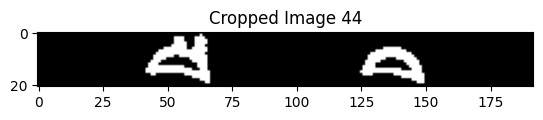

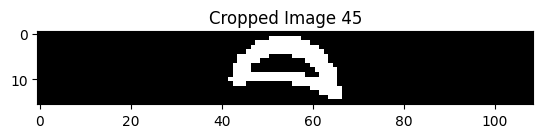

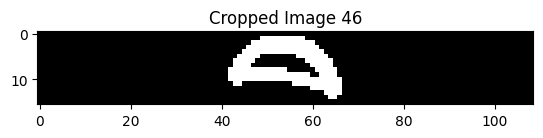

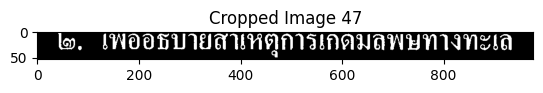

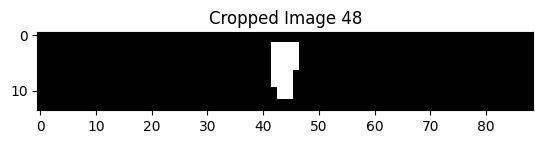

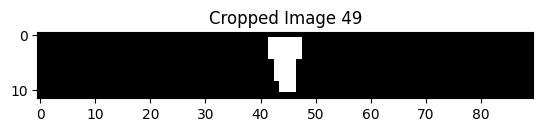

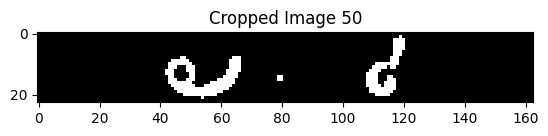

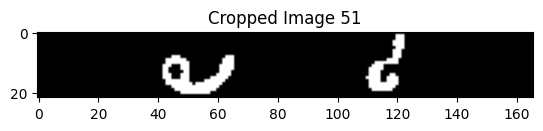

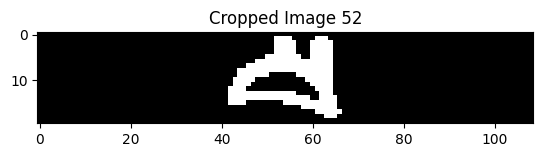

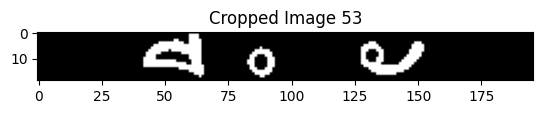

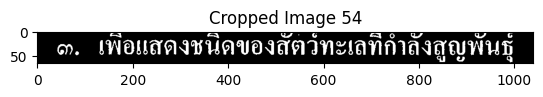

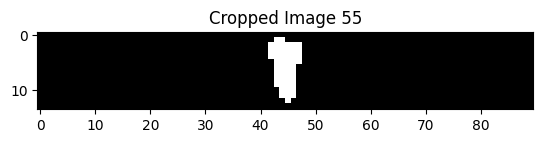

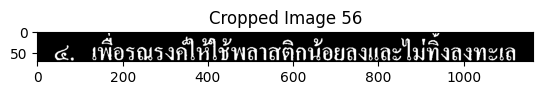

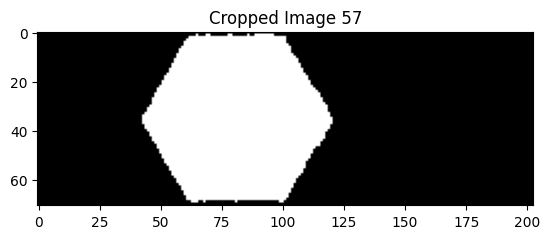

In [45]:
for i in range(len(cropped_thresh)):
    plt.title(f'Cropped Image {i}')
    plt.imshow(cropped_thresh[i], cmap='gray')
    plt.show()

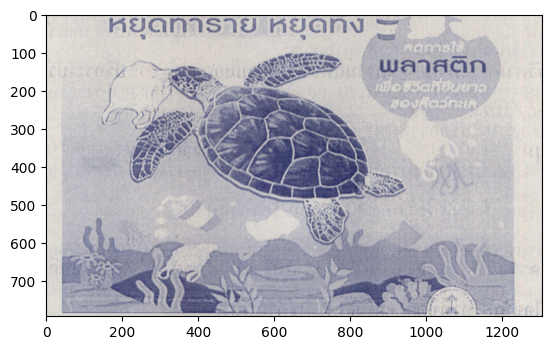

In [46]:
for i in picture:
    plt.imshow(i)
    plt.show()

In [47]:
def character_segmentation(img):
    """
    Segment characters in the given image.

    Parameters:
        img (ndarray): Binary image containing characters.

    Returns:
        segmented_characters (list): List of segmented characters.
    """
    labels, num_labels = label_connected_components(img)
    segmented_characters = []

    for i in range(1, num_labels + 1):
        indices = np.where(labels == i)
        min_row, min_col = np.min(indices, axis=1)
        max_row, max_col = np.max(indices, axis=1)
        
        character_segment = img[min_row:max_row+1, min_col:max_col+1]
        segmented_characters.append(character_segment)
    
    return segmented_characters


def label_connected_components(binary_image):
    """
    Label connected components in the binary image.

    Parameters:
        binary_image (ndarray): Binary image to label connected components.

    Returns:
        labels (ndarray): Matrix containing labels of each pixel.
        num_labels (int): Number of labels.
    """
    labels = np.zeros_like(binary_image)
    label_count = 1

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 255 and labels[i, j] == 0:
                stack = [(i, j)]
                while stack:
                    row, col = stack.pop()
                    labels[row, col] = label_count
                    for dr in [-1, 0, 1]:
                        for dc in [-1, 0, 1]:
                            if dr == 0 and dc == 0:
                                continue
                            r = row + dr
                            c = col + dc
                            if 0 <= r < binary_image.shape[0] and 0 <= c < binary_image.shape[1] and \
                               binary_image[r, c] == 255 and labels[r, c] == 0:
                                stack.append((r, c))
                label_count += 1

    num_labels = label_count - 1
    return labels, num_labels


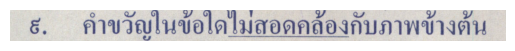

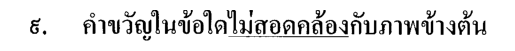

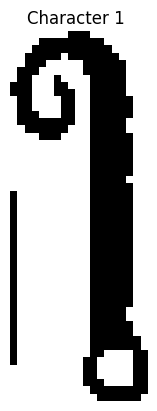

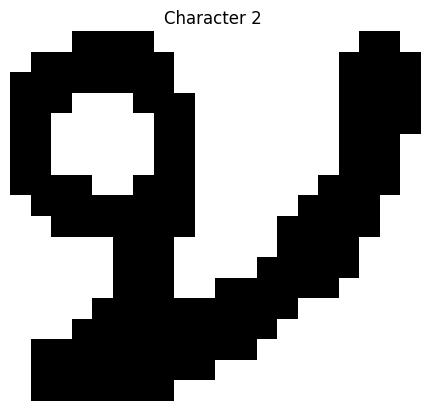

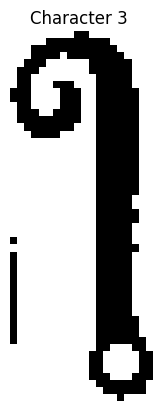

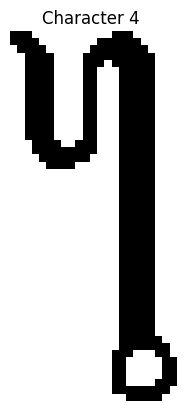

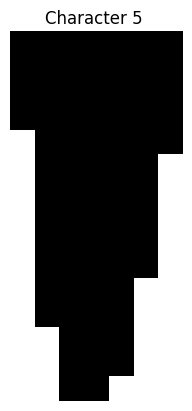

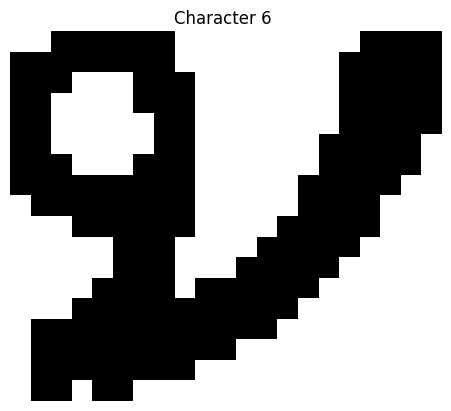

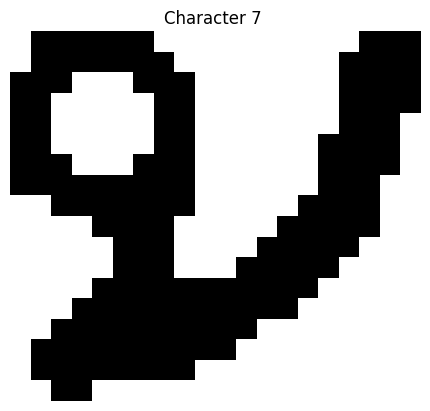

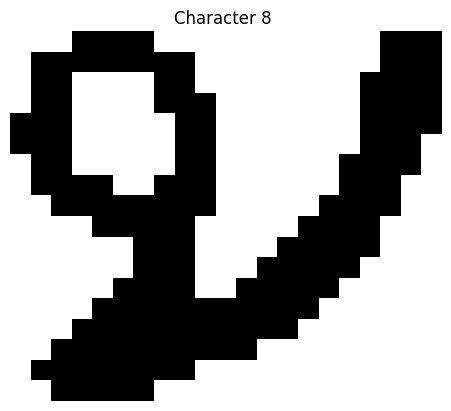

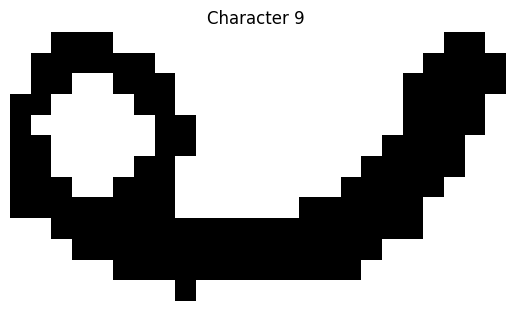

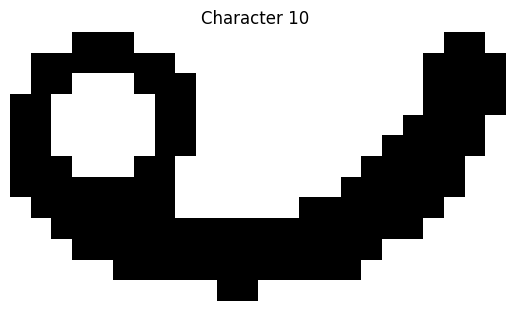

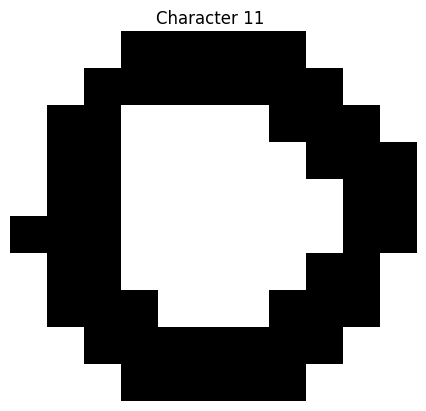

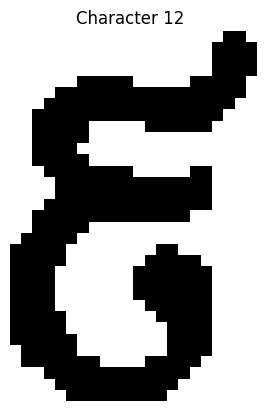

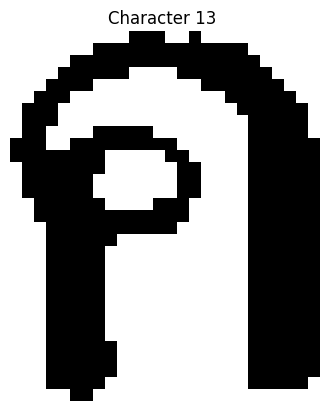

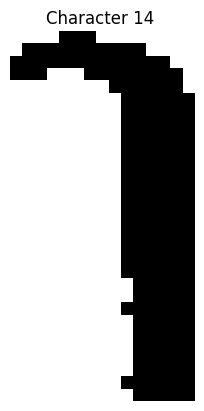

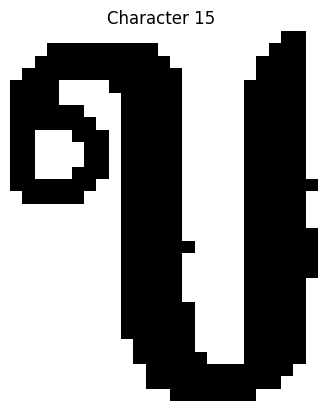

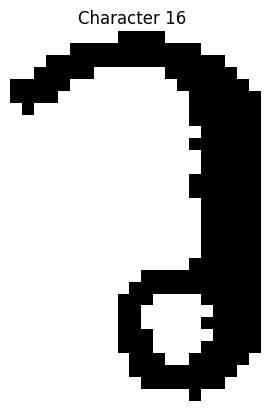

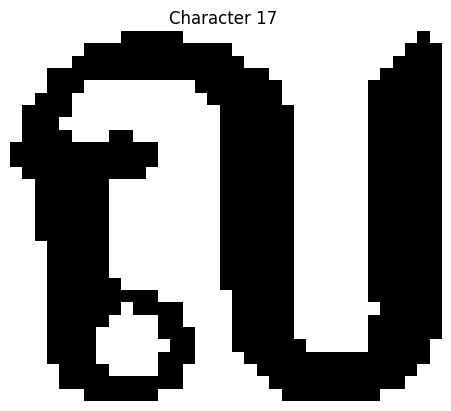

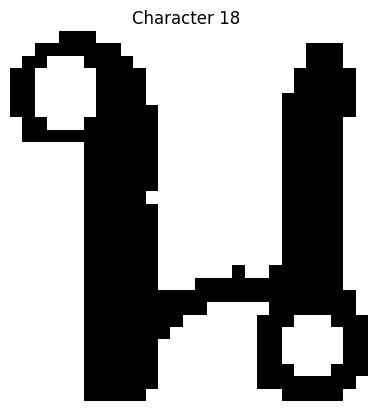

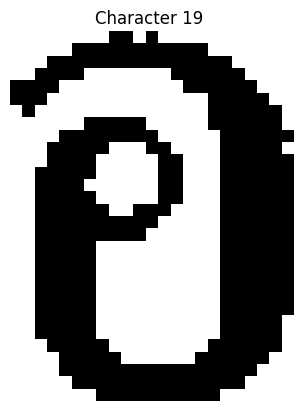

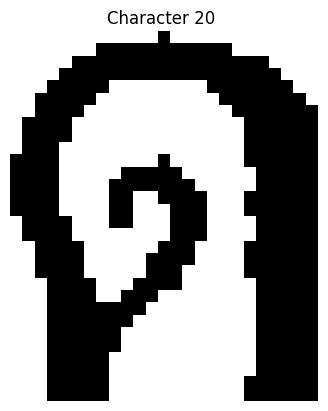

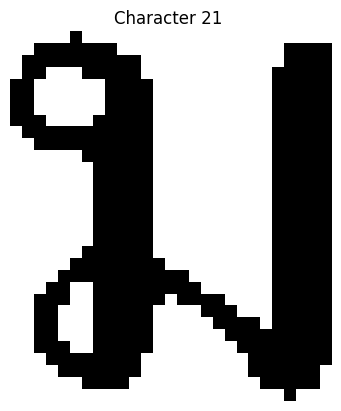

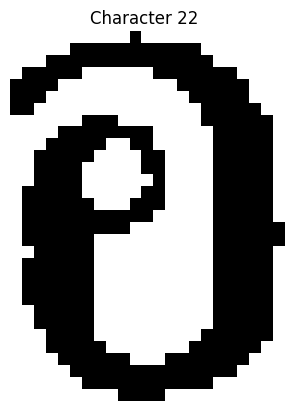

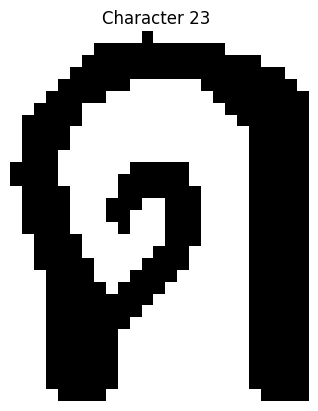

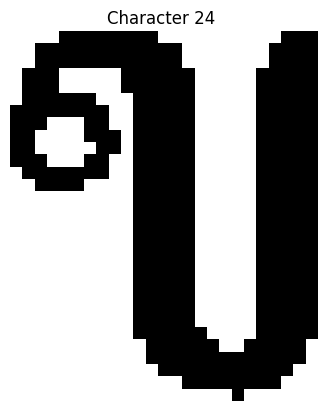

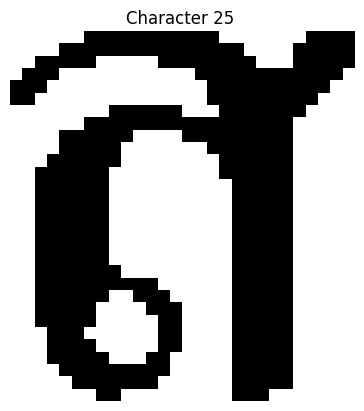

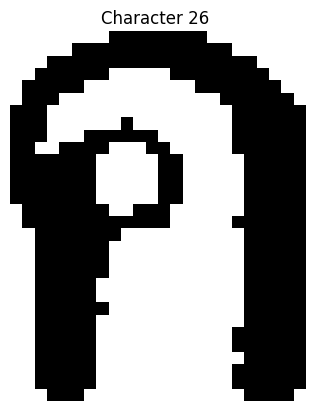

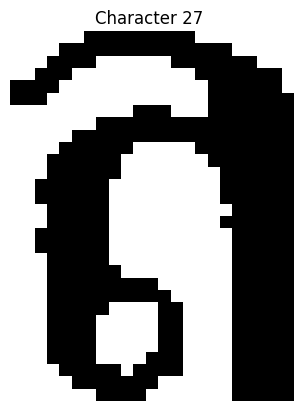

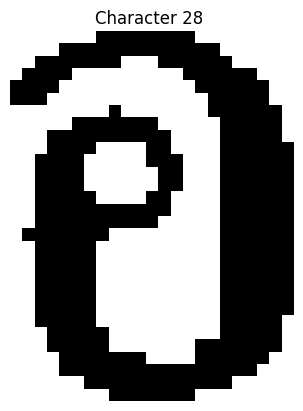

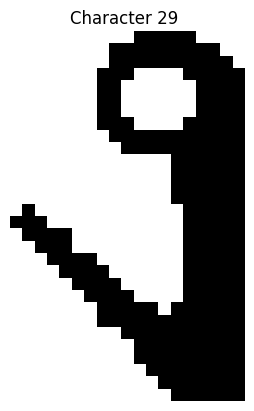

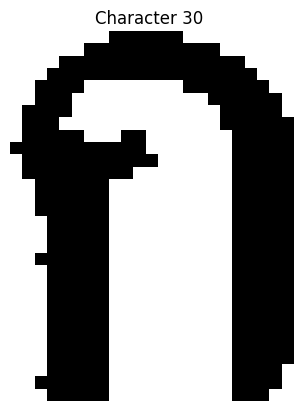

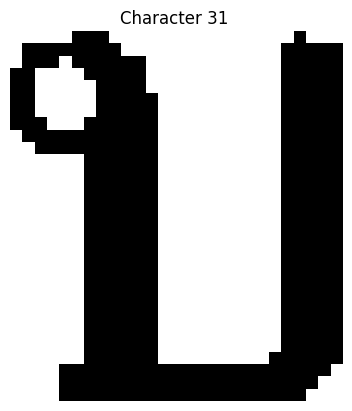

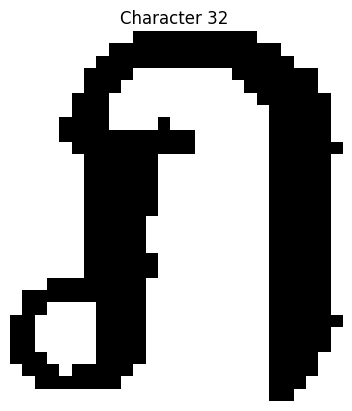

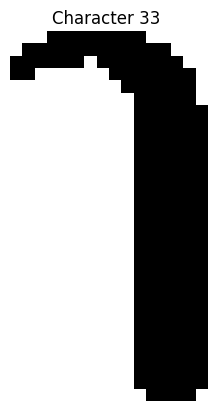

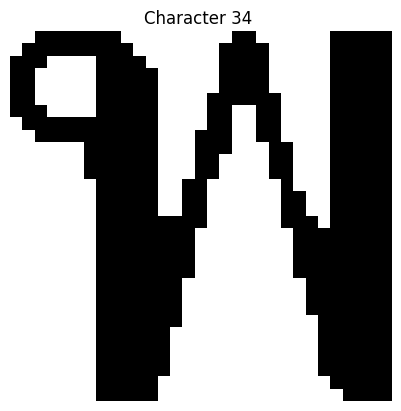

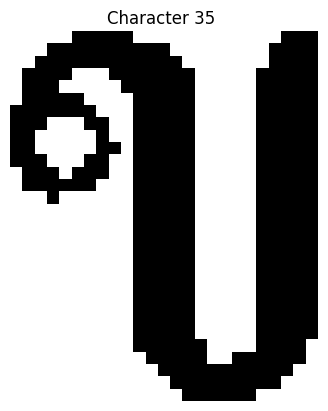

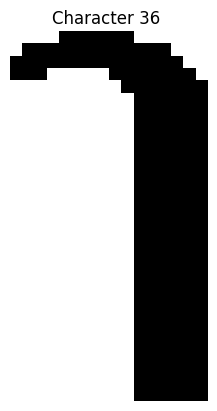

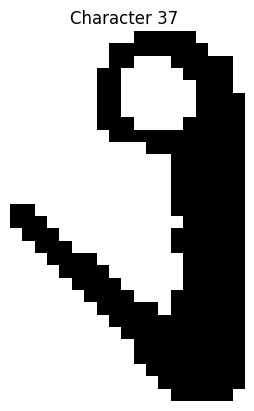

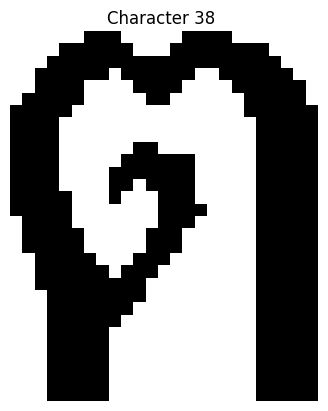

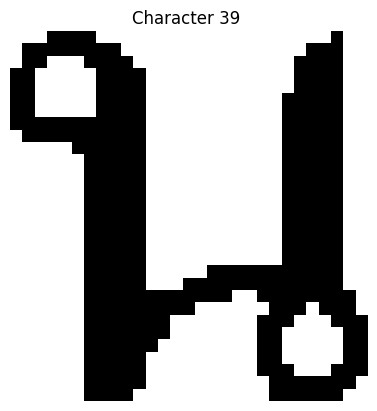

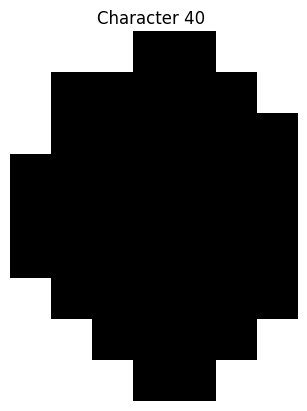

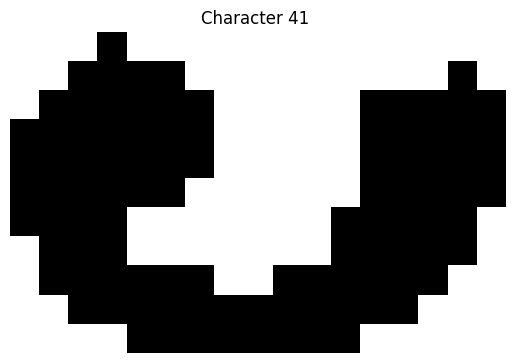

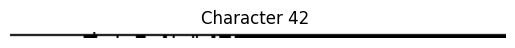

In [48]:
store = []
segmented_character = character_segmentation(cropped_thresh[20])
plt.figure()
plt.imshow(cropped_images[20], cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(cv2.bitwise_not(cropped_thresh[20]), cmap='gray')
plt.axis('off')
plt.show()
for i, char_segment in enumerate(segmented_character):
    store.append(cv2.bitwise_not(char_segment))
    plt.figure()
    plt.imshow(cv2.bitwise_not(char_segment), cmap='gray')
    plt.title(f'Character {i + 1} ')
    plt.axis('off')
    plt.show()